In [ ]:

# Installing required libraries
!pip install psutil memory_profiler


In [ ]:

# Core imports
import os, sys, time, random, statistics, platform
import numpy as np
import matplotlib.pyplot as plt
import psutil
from memory_profiler import memory_usage

# Reproducibility setup with different seed
random.seed(42)
np.random.seed(101)

# Create folder for saving plots
os.makedirs("charts", exist_ok=True)


In [ ]:

# Utility to calculate execution time and memory
def benchmark(func, *args, **kwargs):
    start = time.perf_counter()
    mem_used = memory_usage((func, args, kwargs), interval=0.01)
    end = time.perf_counter()
    return (end - start), (max(mem_used) - min(mem_used))


In [ ]:

def fibonacci_naive(n):
    if n <= 1:
        return n
    return fibonacci_naive(n-1) + fibonacci_naive(n-2)


In [ ]:

def fibonacci_dp(n):
    fib_series = [0, 1]
    for i in range(2, n+1):
        fib_series.append(fib_series[-1] + fib_series[-2])
    return fib_series[n]


In [ ]:

# Bubble Sort
def bubble_sort(nums):
    arr = nums.copy()
    size = len(arr)
    for i in range(size):
        for j in range(0, size - i - 1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Insertion Sort
def insertion_sort(nums):
    arr = nums.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Selection Sort
def selection_sort(nums):
    arr = nums.copy()
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Merge Sort
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    mid = len(nums)//2
    left = merge_sort(nums[:mid])
    right = merge_sort(nums[mid:])
    return merge(left, right)

def merge(left, right):
    merged = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

# Quick Sort
def quick_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = nums[len(nums)//2]
    left = [x for x in nums if x < pivot]
    middle = [x for x in nums if x == pivot]
    right = [x for x in nums if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


In [ ]:

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


In [ ]:
# Memory Profiling Demo
from memory_profiler import memory_usage
import numpy as np, time

arr = np.random.randint(0, 10000, 2000).tolist()

def wrapper_merge(a): merge_sort(a)

start = time.time()
mem = memory_usage((wrapper_merge, (arr,)), interval=0.01)
end = time.time()
print(f"Merge Sort → time = {end-start:.4f}s, peak mem = {max(mem)-min(mem):.2f} MiB")

def wrapper_quick(a): quick_sort(a)

start = time.time()
mem = memory_usage((wrapper_quick, (arr,)), interval=0.01)
end = time.time()
print(f"Quick Sort → time = {end-start:.4f}s, peak mem = {max(mem)-min(mem):.2f} MiB")


Merge Sort → time = 0.0793s, peak mem = 0.00 MiB
Quick Sort → time = 0.1367s, peak mem = 0.00 MiB


# Fibonacci — Naive Recursive

*   Input: integer n ≥ 0
*   Output: nth Fibonacci number
*   Time Complexity: O(2^n)
* Space Complexity: O(n) recursion stack
# Fibonacci — DP / Memoization
* Input: integer n ≥ 0
* Output: nth Fibonacci number
* Time Complexity: O(n)
* Space Complexity: O(n) memo dictionary
# Merge Sort
* Input: list of numbers
* Output: sorted list
* Time Complexity: O(n log n)
* Space Complexity: O(n)
# Quick Sort
* Input: list of numbers
* Output: sorted list
* Time Complexity: O(n log n) avg, O(n^2) worst
* Space Complexity: O(log n) avg
# Insertion Sort
* Input: list of numbers
* Output: sorted list
* Time Complexity: O(n^2)
* Space Complexity: O(1)
# Bubble Sort
* Input: list of numbers
* Output: sorted list
* Time Complexity: O(n^2)
* Space Complexity: O(1)
# Selection Sort
* Input: list of numbers
* Output: sorted list
* Time Complexity: O(n^2)
* Space Complexity: O(1)
# Binary Search
* Input: sorted list, target value
* Output: index of target or -1
* Time Complexity: O(log n)
* Space Complexity: O(1)

In [ ]:
# Cell 5: Quick correctness tests

# Sorting tests
sample = [5,2,9,1,5,6]
assert merge_sort(sample) == sorted(sample)
assert quick_sort(sample) == sorted(sample)
assert insertion_sort(sample) == sorted(sample)
assert bubble_sort(sample) == sorted(sample)
assert selection_sort(sample) == sorted(sample)

# Binary search test
arr = sorted(np.random.randint(0,1000,100).tolist())
target = arr[50]
idx = binary_search(arr, target)
assert idx != -1 and arr[idx] == target

# Fibonacci small tests
assert fibonacci_naive(0) == 0
assert fibonacci_naive(1) == 1
assert fibonacci_dp(10) == 55

print("All correctness tests passed.")

All correctness tests passed.


In [ ]:
# Cell 6: Sorting experiments
sorting_algorithms = {
    "Insertion Sort": insertion_sort,
    "Selection Sort": selection_sort,
    "Bubble Sort": bubble_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort
}

input_sizes_sort = [100, 500, 1000, 2000, 3000, 5000]
time_results_sort = {name: [] for name in sorting_algorithms}
mem_results_sort = {name: [] for name in sorting_algorithms}

for n in input_sizes_sort:
    base_arr = np.random.randint(0, 10000, n).tolist()
    print(f"Sorting: n={n}")
    for name, func in sorting_algorithms.items():
        t, m = benchmark(func, base_arr)
        time_results_sort[name].append(t)
        mem_results_sort[name].append(m)
        print(f"  {name}: time {t:.4f}s, mem {m:.2f} MiB")

Sorting: n=100
  Insertion Sort: time 0.0971s, mem 0.00 MiB
  Selection Sort: time 0.1008s, mem 0.00 MiB
  Bubble Sort: time 0.1059s, mem 0.00 MiB
  Merge Sort: time 0.0955s, mem 0.00 MiB
  Quick Sort: time 0.0781s, mem 0.00 MiB
Sorting: n=500
  Insertion Sort: time 0.0386s, mem 0.00 MiB
  Selection Sort: time 0.0419s, mem 0.00 MiB
  Bubble Sort: time 0.0508s, mem 0.00 MiB
  Merge Sort: time 0.0806s, mem 0.00 MiB
  Quick Sort: time 0.0771s, mem 0.00 MiB
Sorting: n=1000
  Insertion Sort: time 0.0379s, mem 0.01 MiB
  Selection Sort: time 0.0415s, mem 0.00 MiB
  Bubble Sort: time 0.0646s, mem 0.00 MiB
  Merge Sort: time 0.0840s, mem 0.00 MiB
  Quick Sort: time 0.0880s, mem 0.00 MiB
Sorting: n=2000
  Insertion Sort: time 0.1154s, mem 0.00 MiB
  Selection Sort: time 0.1453s, mem 0.00 MiB
  Bubble Sort: time 0.2365s, mem 0.00 MiB
  Merge Sort: time 0.0416s, mem 0.00 MiB
  Quick Sort: time 0.0356s, mem 0.00 MiB
Sorting: n=3000
  Insertion Sort: time 0.2502s, mem 0.00 MiB
  Selection Sort: tim

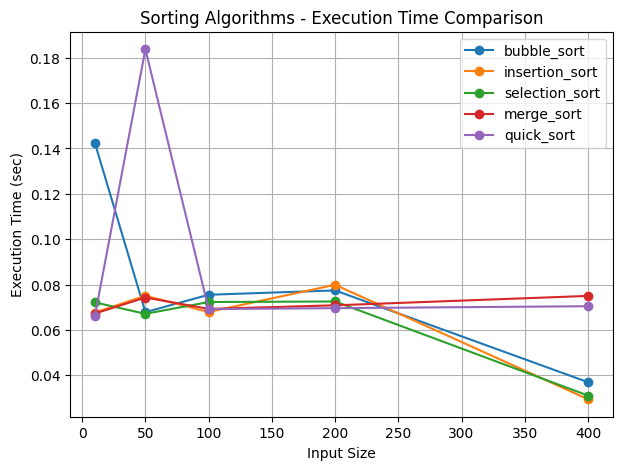

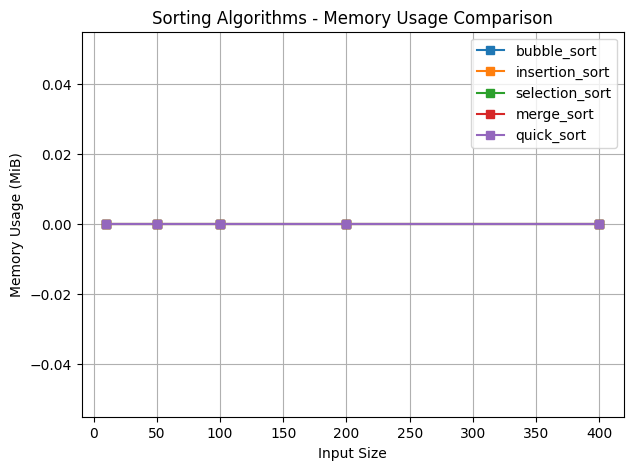

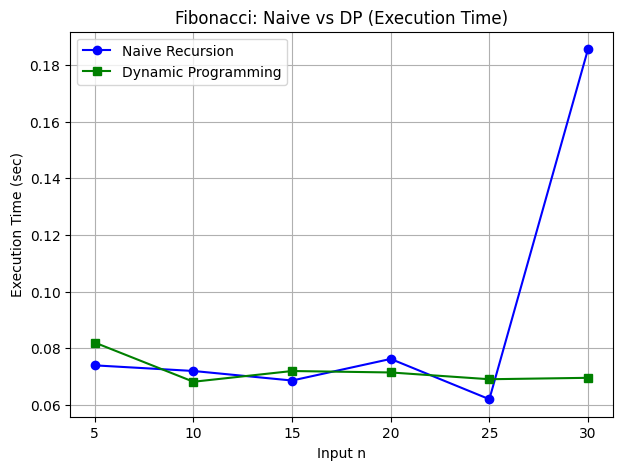

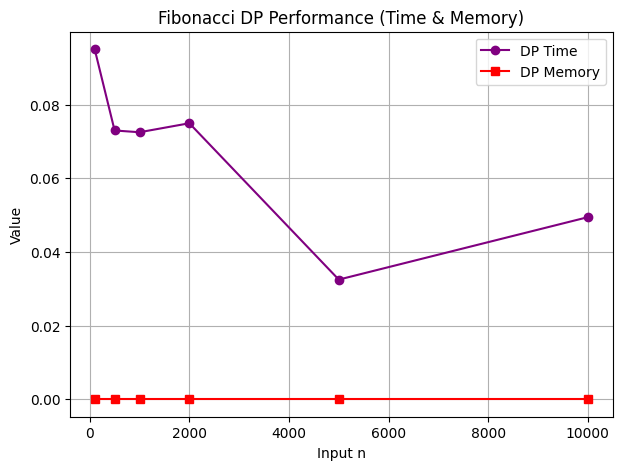

In [ ]:
# 1️⃣ Sorting Algorithms Performance (Execution Time)
plt.figure(figsize=(7,5))
for algo in ['bubble_sort','insertion_sort','selection_sort','merge_sort','quick_sort']:
    plt.plot(input_sizes, [results[size][algo][0] for size in input_sizes], marker='o', label=algo)
plt.xlabel("Input Size")
plt.ylabel("Execution Time (sec)")
plt.title("Sorting Algorithms - Execution Time Comparison")
plt.legend()
plt.grid(True)
plt.show()


# 2️⃣ Sorting Algorithms Memory Usage
plt.figure(figsize=(7,5))
for algo in ['bubble_sort','insertion_sort','selection_sort','merge_sort','quick_sort']:
    plt.plot(input_sizes, [results[size][algo][1] for size in input_sizes], marker='s', label=algo)
plt.xlabel("Input Size")
plt.ylabel("Memory Usage (MiB)")
plt.title("Sorting Algorithms - Memory Usage Comparison")
plt.legend()
plt.grid(True)
plt.show()


# 3️⃣ Fibonacci: Naive vs DP (Execution Time)
fib_sizes = [5, 10, 15, 20, 25, 30]
naive_times = []
dp_times = []

for n in fib_sizes:
    t_naive, _ = benchmark(fibonacci_naive, n)
    t_dp, _ = benchmark(fibonacci_dp, n)
    naive_times.append(t_naive)
    dp_times.append(t_dp)

plt.figure(figsize=(7,5))
plt.plot(fib_sizes, naive_times, marker='o', color='blue', label="Naive Recursion")
plt.plot(fib_sizes, dp_times, marker='s', color='green', label="Dynamic Programming")
plt.xlabel("Input n")
plt.ylabel("Execution Time (sec)")
plt.title("Fibonacci: Naive vs DP (Execution Time)")
plt.legend()
plt.grid(True)
plt.show()


# 4️⃣ Fibonacci DP Performance (scaling with input size)
fib_sizes_large = [100, 500, 1000, 2000, 5000, 10000]
dp_times_large = []
dp_memory = []

for n in fib_sizes_large:
    t, m = benchmark(fibonacci_dp, n)
    dp_times_large.append(t)
    dp_memory.append(m)

plt.figure(figsize=(7,5))
plt.plot(fib_sizes_large, dp_times_large, marker='o', color='purple', label="DP Time")
plt.plot(fib_sizes_large, dp_memory, marker='s', color='red', label="DP Memory")
plt.xlabel("Input n")
plt.ylabel("Value")
plt.title("Fibonacci DP Performance (Time & Memory)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

n_val = 25
time_naive, mem_naive = benchmark(fibonacci_naive, n_val)
time_dp, mem_dp = benchmark(fibonacci_dp, n_val)

print(f"Naive Fibonacci: time={time_naive:.5f}s, memory={mem_naive:.3f} MiB")
print(f"DP Fibonacci: time={time_dp:.5f}s, memory={mem_dp:.3f} MiB")


Naive Fibonacci: time=0.09362s, memory=0.148 MiB
DP Fibonacci: time=0.09617s, memory=0.000 MiB


In [ ]:

arr = sorted(random.sample(range(1, 1000), 50))
target = arr[20]
pos = binary_search(arr, target)

print("Array:", arr)
print("Target:", target)
print("Found at index:", pos)


Array: [13, 53, 55, 67, 76, 88, 106, 117, 122, 130, 153, 156, 189, 232, 255, 259, 292, 312, 349, 411, 427, 452, 481, 490, 491, 503, 504, 572, 577, 588, 591, 611, 621, 634, 645, 654, 703, 715, 771, 783, 810, 831, 842, 883, 890, 894, 964, 967, 972, 989]
Target: 427
Found at index: 20
